# IITM - MLP - Week 11

## Imports

In [1]:
# ---------- Common ------------
import os, time, json, random, ast
from datetime import datetime ; from collections import Counter; from pprint import pprint; from statistics import mode

# ---------- Data Manipulation ------------
import pandas as pd; import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from pandas.core import missing
import matplotlib as mpl; from matplotlib import pyplot as plt; from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.express as px

# ---------- Sklearn ------------
from sklearn import set_config

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict, validation_curve, learning_curve, ShuffleSplit, GridSearchCV, RandomizedSearchCV, KFold, RepeatedKFold, permutation_test_score
from sklearn.preprocessing import add_dummy_feature, OrdinalEncoder, OneHotEncoder, LabelBinarizer, LabelEncoder, MultiLabelBinarizer, MinMaxScaler, MaxAbsScaler, StandardScaler, FunctionTransformer, PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, SGDRegressor, Ridge, RidgeCV, Lasso, LassoCV, Perceptron, SGDClassifier, RidgeClassifier
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_percentage_error, explained_variance_score, max_error, mean_absolute_error, r2_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, hinge_loss, make_scorer, log_loss
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, SelectKBest, GenericUnivariateSelect, mutual_info_classif, mutual_info_regression, chi2, f_classif, f_regression, RFE, RFECV, SequentialFeatureSelector, SelectFromModel
from sklearn.datasets import load_digits, load_iris, fetch_california_housing, make_blobs, make_regression, make_classification, make_multilabel_classification, fetch_openml

from sklearn.tree import export_text, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, loguniform, uniform
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

import warnings
warnings.filterwarnings("ignore")  # supress all warning (use with care)

In [2]:
from xgboost import XGBClassifier, XGBRegressor 
# extreme gradient boosting : xgboost

## Presets

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# set_config(display='diagram')

np.random.seed(306)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
# mpl.rc("figure", figsize=(8,6))

# Load MNIST data from keras

In [4]:
digits = load_digits()

print(type(digits)); print()
print(digits.keys()); print()
print(digits.feature_names); print()
print(digits.target_names); print()
print(type(digits.data)); print()
print(type(digits.target)); print()
print(digits.data.shape); print()
print(digits.data[0, :])

<class 'sklearn.utils.Bunch'>

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']

[0 1 2 3 4 5 6 7 8 9]

<class 'numpy.ndarra

# Kmeans : Digits data

## Model

In [11]:
kmeans_kwargs = {'init': 'random', 
                 'n_init': 50, 
                 'max_iter': 500, 
                 'random_state': 0}

pipeline = Pipeline([('Preprocess', MinMaxScaler()),
                     ('Clustering', KMeans(n_clusters=10, 
                                           **kmeans_kwargs))])

pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

## Visualize cluster

In [6]:
cluster_centers = pipeline[-1].cluster_centers_
print(cluster_centers.shape) # 10 clusters, 64 dimension 
print(cluster_centers[0, :])

(10, 64)
[0.00000000e+00 7.44382022e-02 5.43539326e-01 9.10814607e-01
 8.76755618e-01 4.38202247e-01 3.54634831e-02 6.93889390e-18
 5.61797753e-03 2.61235955e-01 7.87921348e-01 5.69171348e-01
 7.00842697e-01 7.49648876e-01 1.16573034e-01 9.36329588e-04
 2.80898876e-03 1.17626404e-01 2.28581461e-01 2.22963483e-01
 7.34550562e-01 6.17977528e-01 5.30196629e-02 4.33680869e-18
 6.50521303e-19 3.74531835e-03 5.93398876e-02 5.16151685e-01
 8.65168539e-01 4.21699438e-01 2.02247191e-02 1.30104261e-18
 0.00000000e+00 4.41412520e-03 4.21348315e-02 2.87921348e-01
 7.34901685e-01 7.64747191e-01 1.64526485e-01 0.00000000e+00
 1.30104261e-18 2.80898876e-02 8.98876404e-02 4.31882022e-02
 2.61938202e-01 7.73876404e-01 3.93960674e-01 9.36329588e-04
 7.58941521e-19 5.72331461e-02 4.60674157e-01 4.13623596e-01
 5.36165730e-01 8.53581461e-01 3.80266854e-01 1.33967156e-02
 3.25260652e-19 5.24344569e-02 5.93750000e-01 9.33286517e-01
 8.82724719e-01 5.55477528e-01 1.17275281e-01 2.59831461e-02]


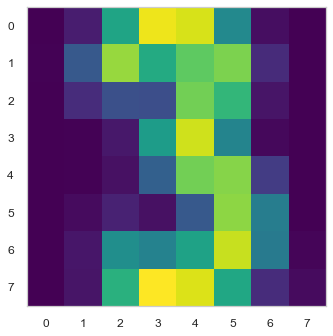

In [7]:
# reshape this flattened cluster, it will form 8x8 image

img = cluster_centers[0, :].reshape(8,8)
plt.grid(False)
plt.imshow(img, cmap="viridis") #https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()

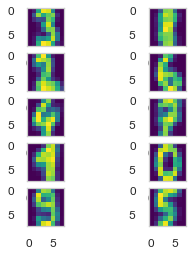

In [8]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
    i.grid(False)
    i.imshow(j, cmap="viridis")

## Optimal number of clusters

### Elbow Method (Using SSE i.e. inertia_)

In [14]:
sse = []

kmeans_kwargs = {'init': 'random', 
                 'n_init': 50, 
                 'max_iter': 500, 
                 'random_state': 0}

scaled = MinMaxScaler().fit_transform(digits.data)

K = range(2,12)

for k in K:
    kmean = KMeans(n_clusters=k, **kmeans_kwargs)
    kmean.fit(scaled)
    sse.append(kmean.inertia_)
    
print(sse)

[7596.204827677877, 6876.970420089994, 6403.91013544186, 5961.2737154680435, 5597.411745517108, 5316.360229547813, 5039.0593535312555, 4793.523535371205, 4647.006063779329, 4516.916139458701]


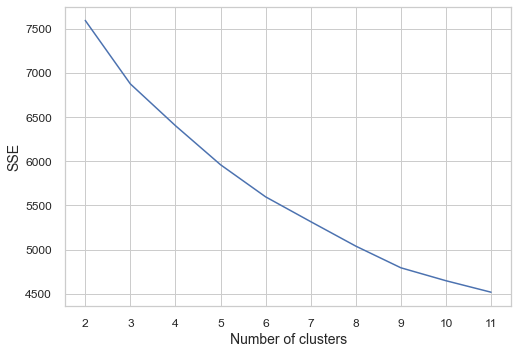

In [15]:
plt.plot(range(2,12), sse)
plt.xticks(range(2,12))
plt.xlabel("Number of clusters")
plt.ylabel('SSE')
plt.show()

There is a slight elbow at k=9, indicating that a few digits could have been merged into a single cluster, thus reducing the total clusters from 10 to 9.

In [19]:
print(kmean.labels_.shape)
print(kmean.labels_[:5])

(1797,)
[ 6  7 10  4  1]


### Silhouette Scoring Method

In [20]:
sil_coef = []
scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef.append(score)

In [24]:
print(list(map(lambda x: round(x,2), sil_coef)))

[0.12, 0.13, 0.13, 0.14, 0.15, 0.16, 0.18, 0.19, 0.18, 0.18, 0.18, 0.19, 0.19]


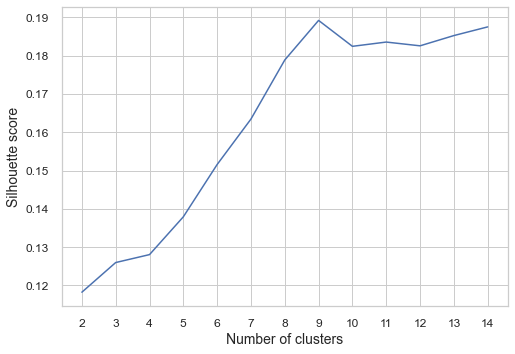

In [21]:
plt.plot(range(2, 15), sil_coef)
plt.xticks(range(2, 15))
plt.xlabel("Number of clusters")
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

In [27]:
print("Optimal clusters: ", np.argmax(sil_coef)+2) # range starts from 2

Optimal clusters:  9


# HAC : Hierarchial Agglomerative Clustering

## HAC

In [31]:
df = pd.read_csv("wk_11_Live_20210128.csv")
print(df.shape)
df = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type']]
print(df.shape)
df.head()

(7050, 16)
(7050, 10)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,529,512,262,432,92,3,1,1,0,video
1,150,0,0,150,0,0,0,0,0,photo
2,227,236,57,204,21,1,1,0,0,video
3,111,0,0,111,0,0,0,0,0,photo
4,213,0,0,204,9,0,0,0,0,photo


In [32]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [33]:
X = df.drop(columns=["status_type"])
y = df["status_type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

In [36]:
agg_clus = AgglomerativeClustering(n_clusters=4, 
                                   affinity='euclidean', 
                                   linkage='ward')
agg_clus.fit(X_scaled)

print(agg_clus.labels_.shape)
print(agg_clus.labels_[:5])

(7050,)
[3 3 3 3 3]


In [38]:
print(accuracy_score(agg_clus.labels_, y_enc))
print(f"leaves: {agg_clus.n_leaves_}")

0.2849645390070922
leaves: 7050


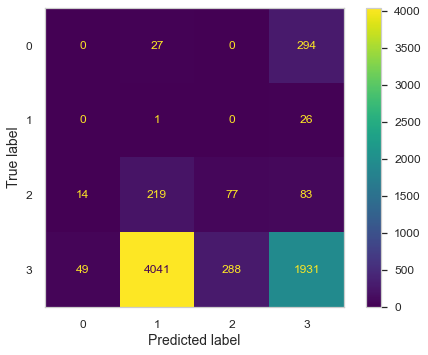

In [37]:
cm_disp = ConfusionMatrixDisplay.from_predictions(agg_clus.labels_, y_enc)
plt.grid(False)
plt.show()

## Dendrogram

In [ ]:
X = StandardScaler().fit_transform(np.array([(8,3),(5,3),(6,4),(1,6),(2,8)]))
plt.figure(figsize=(8,8))
dend = dendrogram(linkage(X, method="ward"))
plt.show()

# Assignment

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
kmeans = KMeans(n_clusters=5, init='random', n_init=50, max_iter=500, random_state=10)

In [4]:
kmeans.fit(X, y)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=50, random_state=10)

In [5]:
kmeans.inertia_

46.446182051282065

In [6]:
all_inertias = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, init='random', n_init=50, max_iter=500, random_state=10)
    kmeans.fit(X, y)
    all_inertias.append(kmeans.inertia_)

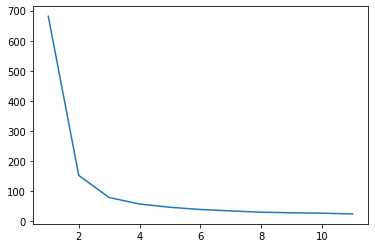

In [7]:
plt.plot(range(1,12), all_inertias)

Using yellowbricks is another way to find the elbow point.

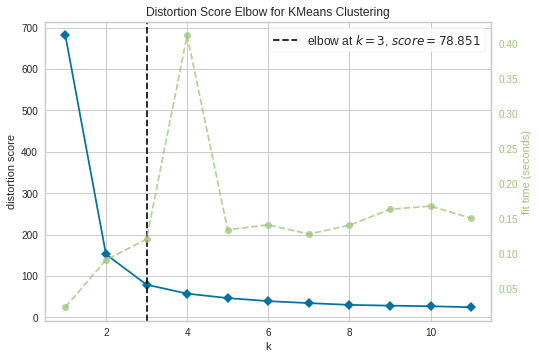

In [8]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='random', n_init=50, max_iter=500, random_state=10)
visual = KElbowVisualizer(model, k=(1,12))

visual.fit(X)        # Fit the data to the visualizer
visual.show()

In [9]:
all_inertias[2] # inertia at k=3

78.851441426146

### Q5-Q6

In [10]:
import pandas as pd

In [11]:
data = load_iris(as_frame=True)

In [12]:
data.data.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit_predict(data.data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
agg.n_leaves_

150

## Graded

Data Set Information:

</br>Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect 
</br>with many customers. Analyze The variability of consumer engagement on Facebook Live data which can help sellers to build 
</br>selling approach and activities for the company.

### Q1-Q8

dataset: "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"

</br>Check if any feature contains Null values.
</br>Drop all the features which have Null values.
</br>Save 'status_type' as target variable.
</br>Drop the feature "status_id", "status_type" and "status_published" from training set.
</br>Use LabelEncoder to transform the target variable.
</br>Use standard scaler to scale the features.

In [3]:
df = pd.read_csv("wk_11_Live_20210128.csv")
print(df.shape)
df = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type']]
df.head()

(7050, 16)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,529,512,262,432,92,3,1,1,0,video
1,150,0,0,150,0,0,0,0,0,photo
2,227,236,57,204,21,1,1,0,0,video
3,111,0,0,111,0,0,0,0,0,photo
4,213,0,0,204,9,0,0,0,0,photo


### For Q1-Q3

In [4]:
df.shape

(7050, 10)

In [5]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### For Q4,Q5 
Train the model using Kmeans clustering (Take Random state=10)

In [6]:
X = df.drop(columns=["status_type"])
y = df["status_type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)

In [7]:
km = KMeans(n_clusters=2, random_state=10)
km.fit(X_scaled, y_enc)
km.inertia_

48278.098242205444

In [8]:
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_scaled, y_enc)

KMeans(n_clusters=4, random_state=10)

In [9]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1])

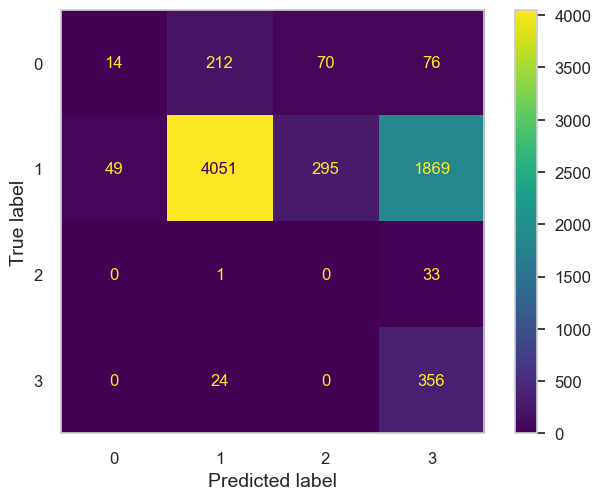

In [10]:
cm_disp = ConfusionMatrixDisplay.from_predictions(km.labels_, y_enc)
plt.grid(False)
plt.show()

In [43]:
14+4051+0+356

4421

In [11]:
silhouette_score(X_scaled, km.labels_)

0.7577030782310119

### For Q6,Q7,Q8 
Train the model using Agglomerative Clustering by setting the parameter as following
</br>n_clusters=4,affinity='euclidean', linkage='ward'

In [37]:
# What is the label predicted for first row of samples.
# Enter the number of leaves in the hierarchical tree.
# What is the accuracy of the model(in Percentage)?

0.8369440882741959

In [13]:
agg_clus = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clus.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [14]:
agg_clus.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [18]:
agg_clus.labels_[0]

3

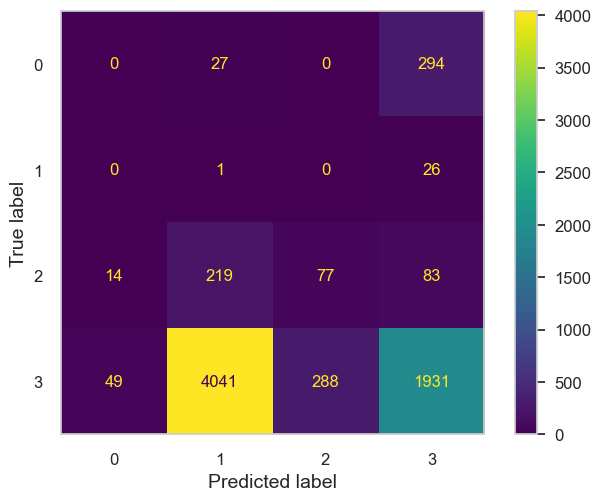

In [19]:
cm_disp = ConfusionMatrixDisplay.from_predictions(agg_clus.labels_, y_enc)
plt.grid(False)
plt.show()

In [20]:
accuracy_score(agg_clus.labels_, y_enc)

0.2849645390070922

In [21]:
agg_clus.n_leaves_

7050

# END